In [5]:
%run ../lib/stock_stats.py

# read in all downloaded files
from os import listdir
from os.path import isfile, join
import ntpath

DATA_DIR = '../data/'
data_files = [DATA_DIR + f for f in listdir(DATA_DIR) if isfile(join(DATA_DIR, f))]

stats = []
for file in data_files:
    with open(file) as f:
        content = [x.strip().split(',') for x in f.readlines()][1:]
        ticker = content[0][0]
        parsed = [(r[1], r[2]) for r in content]
        stats.append((ticker, StockStats(ticker, parsed)))
stats

KeyboardInterrupt: 

In [2]:
YR_TGT = 10
analysis = [(s[0], s[1].std, s[1].annualized_return_rates) for s in stats]
analysis_tgt = [(a[0], a[1][YR_TGT], a[2][YR_TGT]) for a in analysis if YR_TGT in a[1]]

safe_analysis_tgt = [a for a in analysis_tgt if a[1] < .5 and a[2] > .03]
print(safe_analysis_tgt)

[('CSCO', 0.16926491891330464, 0.09806459501783071), ('UAL', 0.35178235508989053, 0.19927179284576835), ('TROW', 0.2318974331262294, 0.12157603528767624), ('ISRG', 0.45488951118765364, 0.2613928353234034), ('PRGO', 0.2880074228038547, 0.10863531827119677), ('LUK', 0.19093679538751987, 0.03461050568447077), ('BA', 0.2986156643638459, 0.23575799975062428), ('VRTX', 0.3981992329258783, 0.1857115480832463), ('BRK.B', 0.13847216489593941, 0.12800451986392747), ('GILD', 0.3961508905882718, 0.1260335464054272), ('EQIX', 0.4256836454678168, 0.23947072094126365), ('TIF', 0.34070941679304745, 0.16265192181362687), ('V', 0.25001199786262557, 0.2521434856341249), ('A', 0.31675589124435233, 0.20713434041448342), ('FOX', 0.28706877957990296, 0.1594542739475573), ('MO', 0.09495500363698219, 0.16664235433350316), ('MCHP', 0.21665361627186733, 0.1716626704620845), ('CDNS', 0.21520937863093034, 0.2848067759984876), ('WLTW', 0.14300097875769924, 0.09306544452141785), ('EIX', 0.16222962429000984, 0.068885

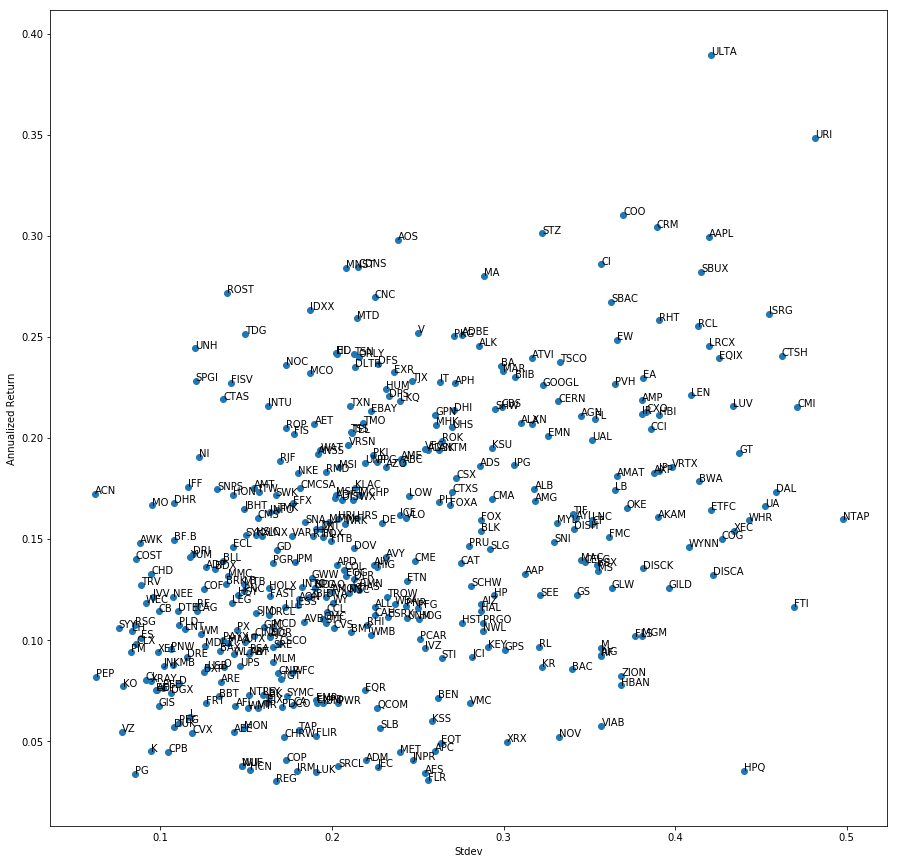

In [59]:
import matplotlib.pyplot as plt

y = [p[1] for p in safe_analysis_tgt]
x = [p[2] for p in safe_analysis_tgt]
n = [p[0] for p in safe_analysis_tgt]

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(y, x)
plt.xlabel("Stdev")
plt.ylabel("Annualized Return")

for i, txt in enumerate(n):
    ax.annotate(txt, (y[i],x[i]))